# PMDS Wahrscheinlichkeit synonyme Codons gleich

$S: sei \ ein\ Tupel\ aller \ synonymen \ Codons \ einer \ Sequenz$



$a_i : ein \ Codon \in S\ an \ der \ Stelle \ i $


$P_{gleich}(a) =  \frac{|(a: a_{i-1}=a_i )|}{|(a :a_i=a, 1 \leq i \leq |S|-1  )|}  $


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from Bio.Data import CodonTable

import seaborn as sns

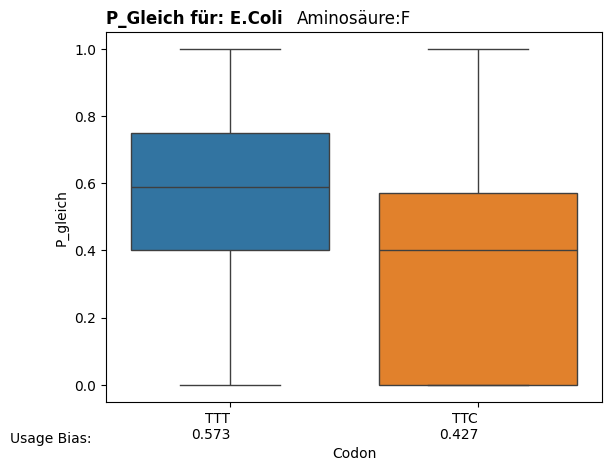

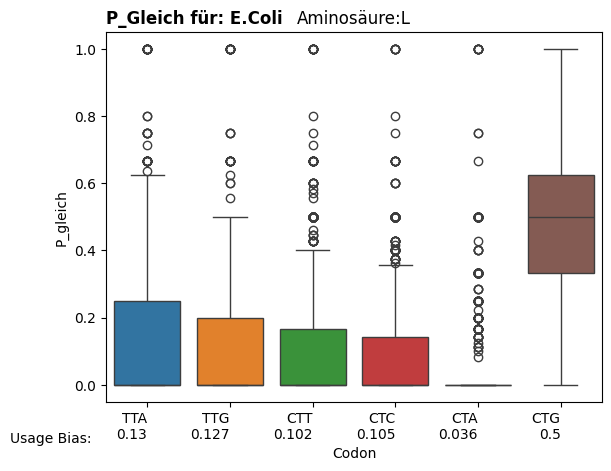

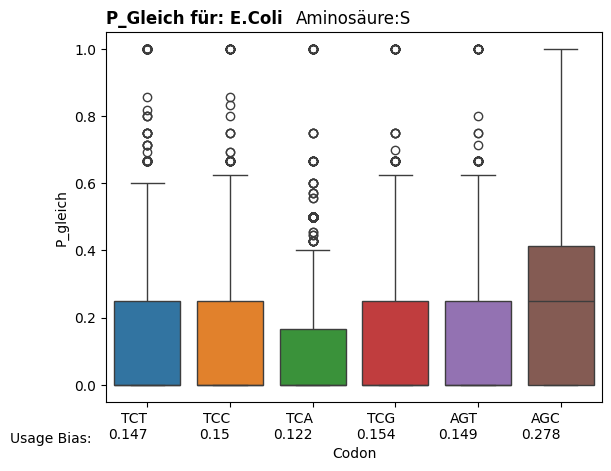

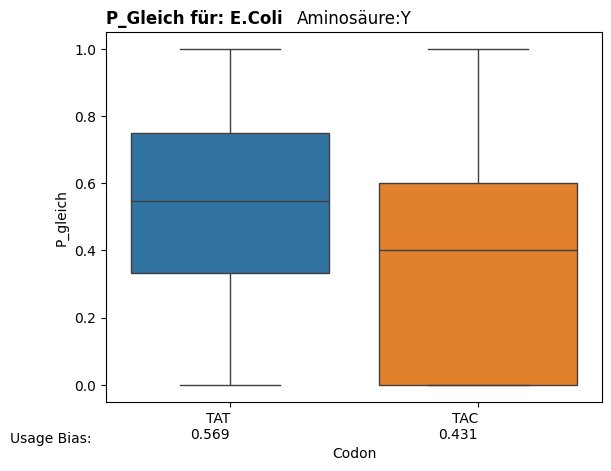

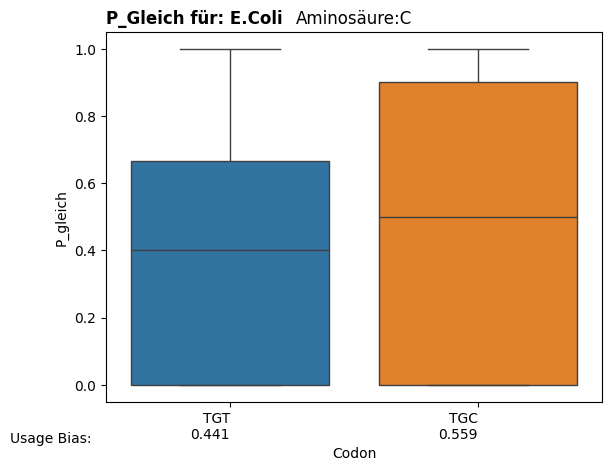

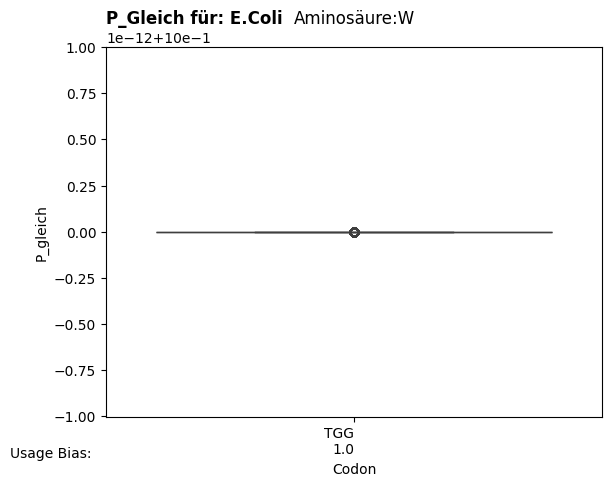

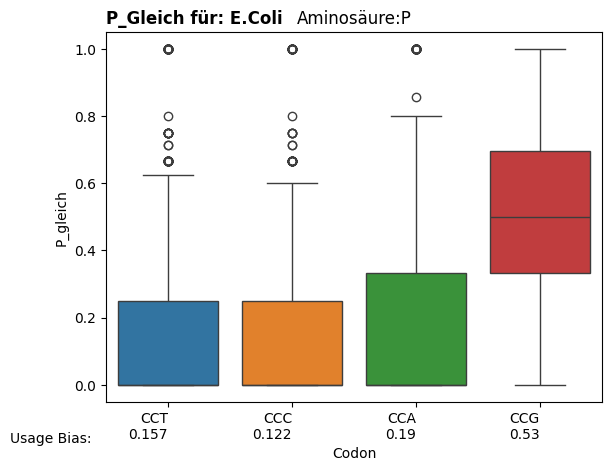

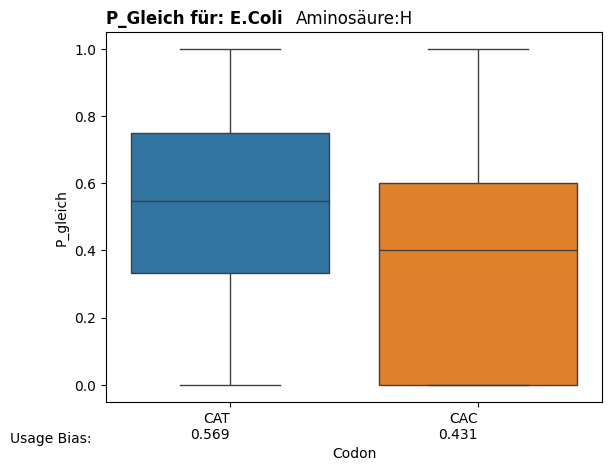

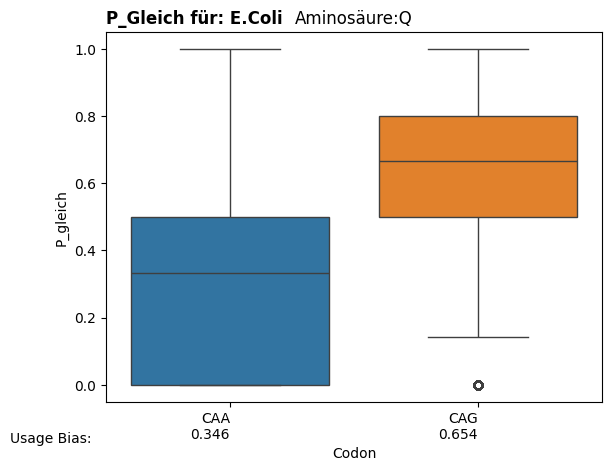

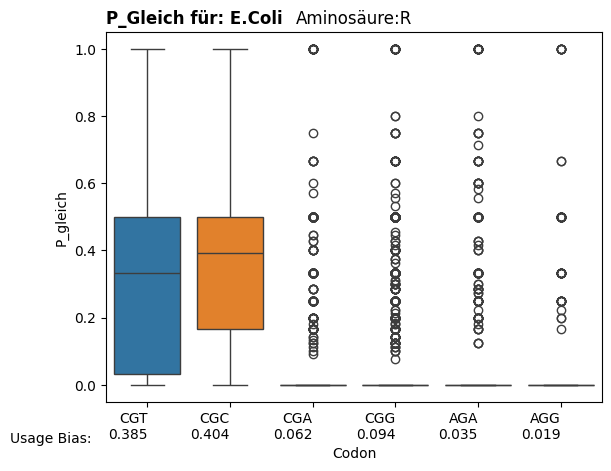

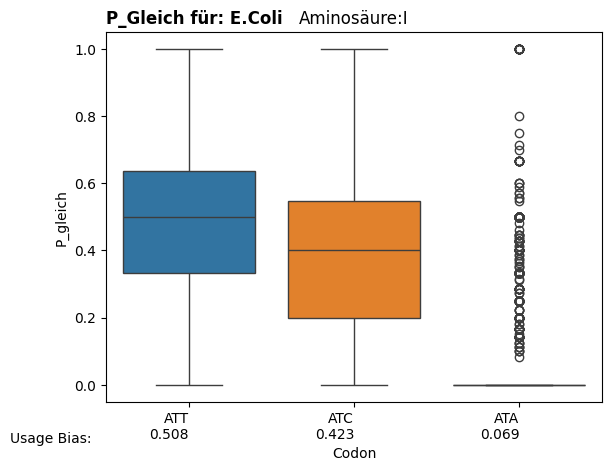

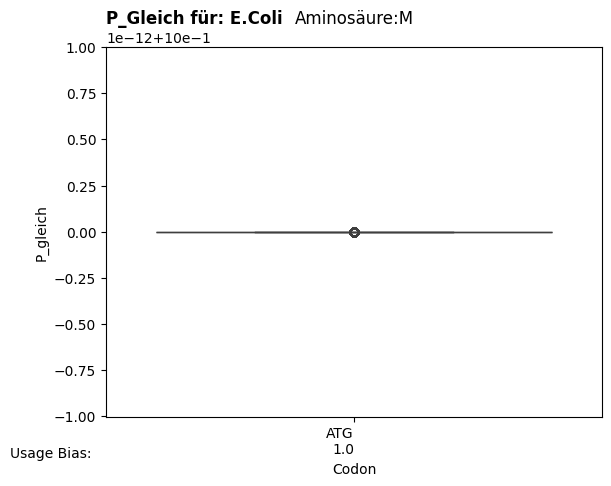

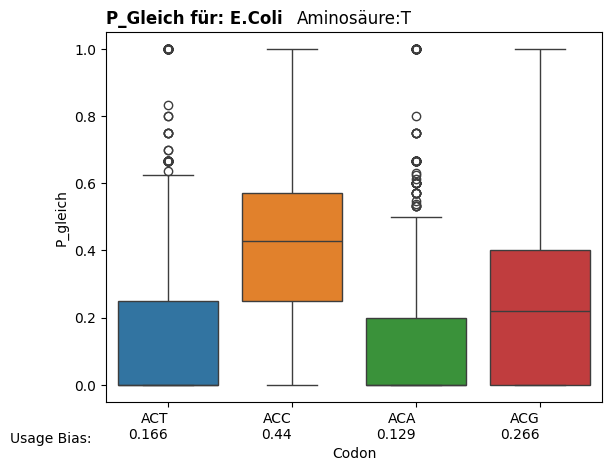

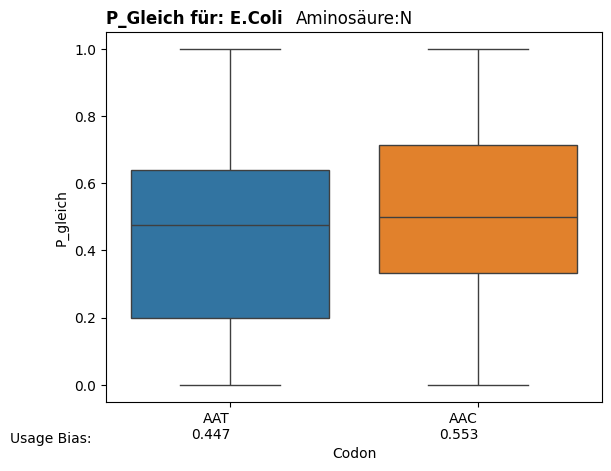

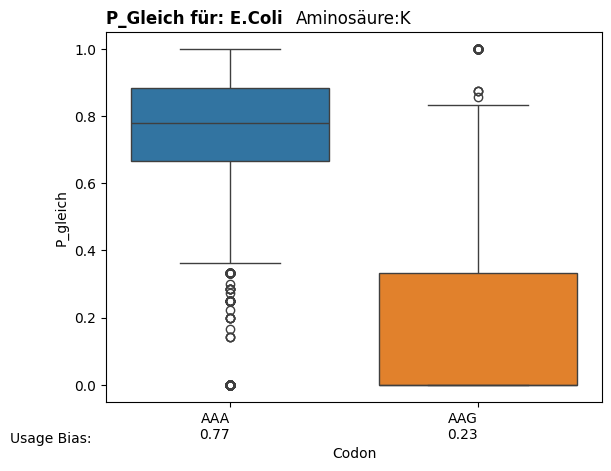

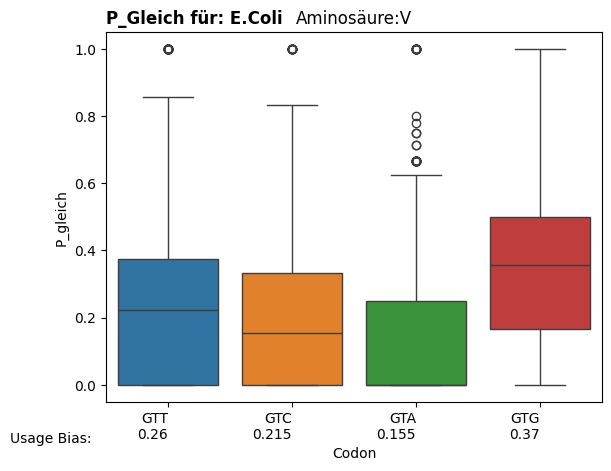

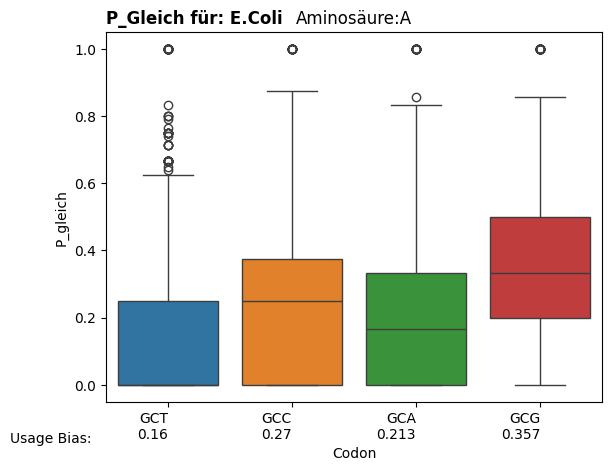

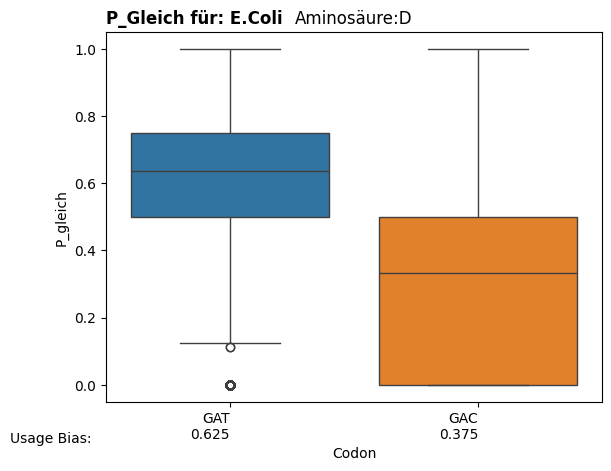

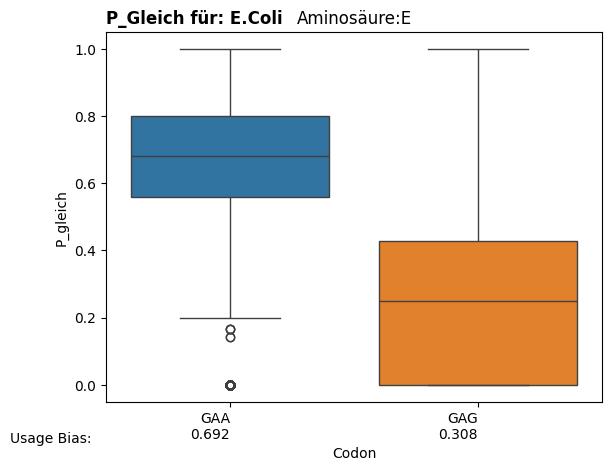

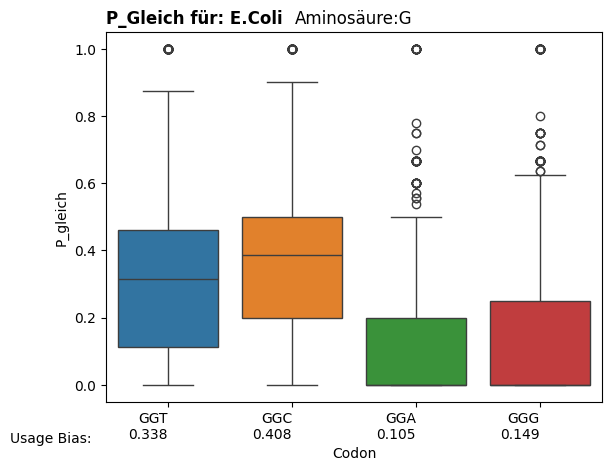

UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

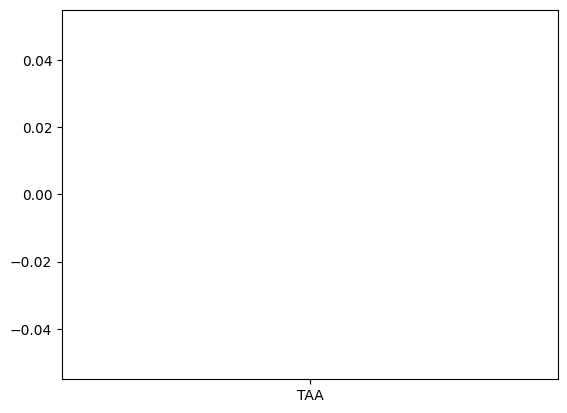

In [2]:
organisms = ["E.Coli"]#"Drosophila.Melanogaster", "Homo.Sapiens"

def plotChangeTabelle(tabelle, usage_bias, organism):
    
    genetic_code = CodonTable.unambiguous_dna_by_id[1]
    translation_table = {}
    for i in genetic_code.forward_table:
        translation_table.setdefault(genetic_code.forward_table[i], []).append(i)
    translation_table['*'] = ['TAA', 'TAG', 'TGA']

    for k,v in translation_table.items():
           
        sns.boxplot(tabelle[v])
          
        plt.xlabel("Codon")
        plt.ylabel("P_gleich")
        column_names = tabelle[v].columns.tolist()
        for i in range(len(column_names)):
            column_names[i] = column_names[i] + '\n'  +str(round(usage_bias[k][column_names[i]],3))
            
    
        plt.xticks(range(0,len(column_names)), column_names,rotation=0, ha='right')
        plt.title('P_Gleich für: ' +organism, fontweight='bold', loc='left')
        plt.title('Aminosäure:' +k)
        plt.gcf().text(-0.025, 0.025, 'Usage Bias:', fontsize=10)
        plt.show()
     

for organism in organisms:
    tabelle = pd.read_pickle(f"../data/{organism}/changeTable.pkl")
    usage_bias = pd.read_pickle(f"../data/{organism}/usageBias.pkl")
    plotChangeTabelle(tabelle,usage_bias,organism)



